In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table align="left">
<td style="text-align: center">
<a href="https://art-analytics.appspot.com/r.html?uaid=G-ZLZY9NDFZD&utm_source=aRT-adv_prompting_notebook-from_notebook-colab&utm_medium=aRT-clicks&utm_campaign=adv_prompting_notebook-from_notebook-colab&destination=adv_prompting_notebook-from_notebook-colab&url=https%3A%2F%2Fcolab.research.google.com%2Fgithub%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fadvanced_prompting_training%2Fcot_react.ipynb">
<img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
</a>
</td>
      <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-ZLZY9NDFZD&utm_source=aRT-adv_prompting_notebook-from_notebook-colab_ent&utm_medium=aRT-clicks&utm_campaign=adv_prompting_notebook-from_notebook-colab_ent&destination=adv_prompting_notebook-from_notebook-colab_ent&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fcolab%2Fimport%2Fhttps%3A%252F%252Fraw.githubusercontent.com%252FGoogleCloudPlatform%252Fapplied-ai-engineering-samples%252Fmain%252Fgenai-on-vertex-ai%252Fadvanced_prompting_training%252Fcot_react.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
<td style="text-align: center">
<a href="https://art-analytics.appspot.com/r.html?uaid=G-ZLZY9NDFZD&utm_source=aRT-adv_prompting_notebook-from_notebook-github&utm_medium=aRT-clicks&utm_campaign=adv_prompting_notebook-from_notebook-github&destination=adv_prompting_notebook-from_notebook-github&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fadvanced_prompting_training%2Fcot_react.ipynb">
<img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
</a>
</td>
<td style="text-align: center">
<a href="https://art-analytics.appspot.com/r.html?uaid=G-ZLZY9NDFZD&utm_source=aRT-adv_prompting_notebook-from_notebook-vai_workbench&utm_medium=aRT-clicks&utm_campaign=adv_prompting_notebook-from_notebook-vai_workbench&destination=adv_prompting_notebook-from_notebook-vai_workbench&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fworkbench%2Fdeploy-notebook%3Fdownload_url%3Dhttps%3A%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fadvanced_prompting_training%2Fcot_react.ipynb">
<img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
</a>
</td>
</table>

| | |
|----------|-------------|
| Author(s)   | Michael Chertushkin |
| Reviewers(s) | Rajesh Thallam |
| Last updated | 2024 16 07: Draft |

### Gemini: Multimodal Prompting Strategies - Working with Images

This notebook provides set of prompting strategies for working with Gemini on image files. We will briefly mention this set of best practices right now and then we will show the examples.

Here is the list of best practices:
- Use specific instructions
- Explicitly set the Persona
- Explicitly set the Mission
- Explain the steps one-by-one
- Use structured output
- If you ask to output reasoning behind the decision, ask to output reasoning before the decision, for example helpfullness reasoning should come in output before helpfullness score
- Put media content before text content. If you have images, but image before the prompt, the same goes for audio and video.



### Content

This notebook has following sections:
- Setup
- Image Understanding
- Image Understanding. System prompt
- Image Understanding. Few-shot examples
- Image Understanding. Order of images and texts
- Document Understanding
- Mathematical Understanding

### Setup

In [ ]:
PROJECT_ID = "chertushkin-genai-sa"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}
MODEL_NAME = "gemini-1.5-pro-001"

import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()
    print('Authenticated')

Authenticated


In [ ]:
!gsutil --version

gsutil version: 5.30


In [ ]:
bucket_name = "multimodal-examples"
source_blob_name = "example_1.jpg"
destination_file_name = "example_1.jpg"

!gsutil cp gs://{bucket_name}/{source_blob_name} {destination_file_name}

Copying gs://multimodal-examples/example_1.jpg...
/ [1 files][  1.8 MiB/  1.8 MiB]                                                
Operation completed over 1 objects/1.8 MiB.                                      


In [ ]:
from IPython.display import Image

### Introduction

This notebook shows how to prompt multimodal models with the images domain. There are several distinct categories when we want to work with images, depending on the concrete task. These categories serve different purposes and hence require different prompting techniques. On the high-level, here are the image tasks that you can perform with image multimodal models:
- Image Understanding (image + text -> text)
- Image Captioning (image + text -> text)
- Image Generation (text -> image)

Image Generation is done by another model, here we focus only on Gemini. So we will omit Image Generation task for this notebook, ie our output will be only text.

First two tasks require combination of two modalities: text and image, hence they are going to use multimodal models.


#### Important comment
There is terminological confusion about what is "multimodal model". We are going to use the definition that multimodal model is the model that can process different types of inputs, including texts, images, videos and audios. Recent generation of Gemini 1.5 pro is the example of multimodal model.

### Image Understanding Task

This task requires the input to be presented in two different modalities: text and image. The example of the API call is below, however this is non-optimal prompt and we can make it better.

In [ ]:
import vertexai
from vertexai.generative_models import GenerativeModel, Part, FinishReason
import vertexai.preview.generative_models as generative_models

vertexai.init(project=PROJECT_ID, location=LOCATION)
model = GenerativeModel(MODEL_NAME)

In [ ]:
generation_config = {
    "max_output_tokens": 8192,
    "temperature": 0.1,
    "top_p": 0.95,
}

safety_settings = {
    generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
}

def generate(model, input_prompt, input_image, safety_settings, generation_config):
  responses = model.generate_content(
      [input_image, input_prompt],
      generation_config=generation_config,
      safety_settings=safety_settings,
      stream=True,
  )

  for response in responses:
    print(response.text, end="")

In [ ]:
import base64
encoded_image = base64.b64encode(open(destination_file_name, "rb").read()).decode("utf-8")
image_content = Part.from_data(data=base64.b64decode(encoded_image), mime_type="image/jpeg")

prompt = "Describe what is depicted on the image"

In [ ]:
generate(model, prompt, image_content, safety_settings, generation_config)

President Barack Obama jokes with North Carolina Governor Bev Perdue's Chief of Staff, Tim Finkenstad, as he weighs in before playing basketball at the North Raleigh YMCA in Raleigh, N.C., April 26, 2012.  (Official White House Photo by Pete Souza)

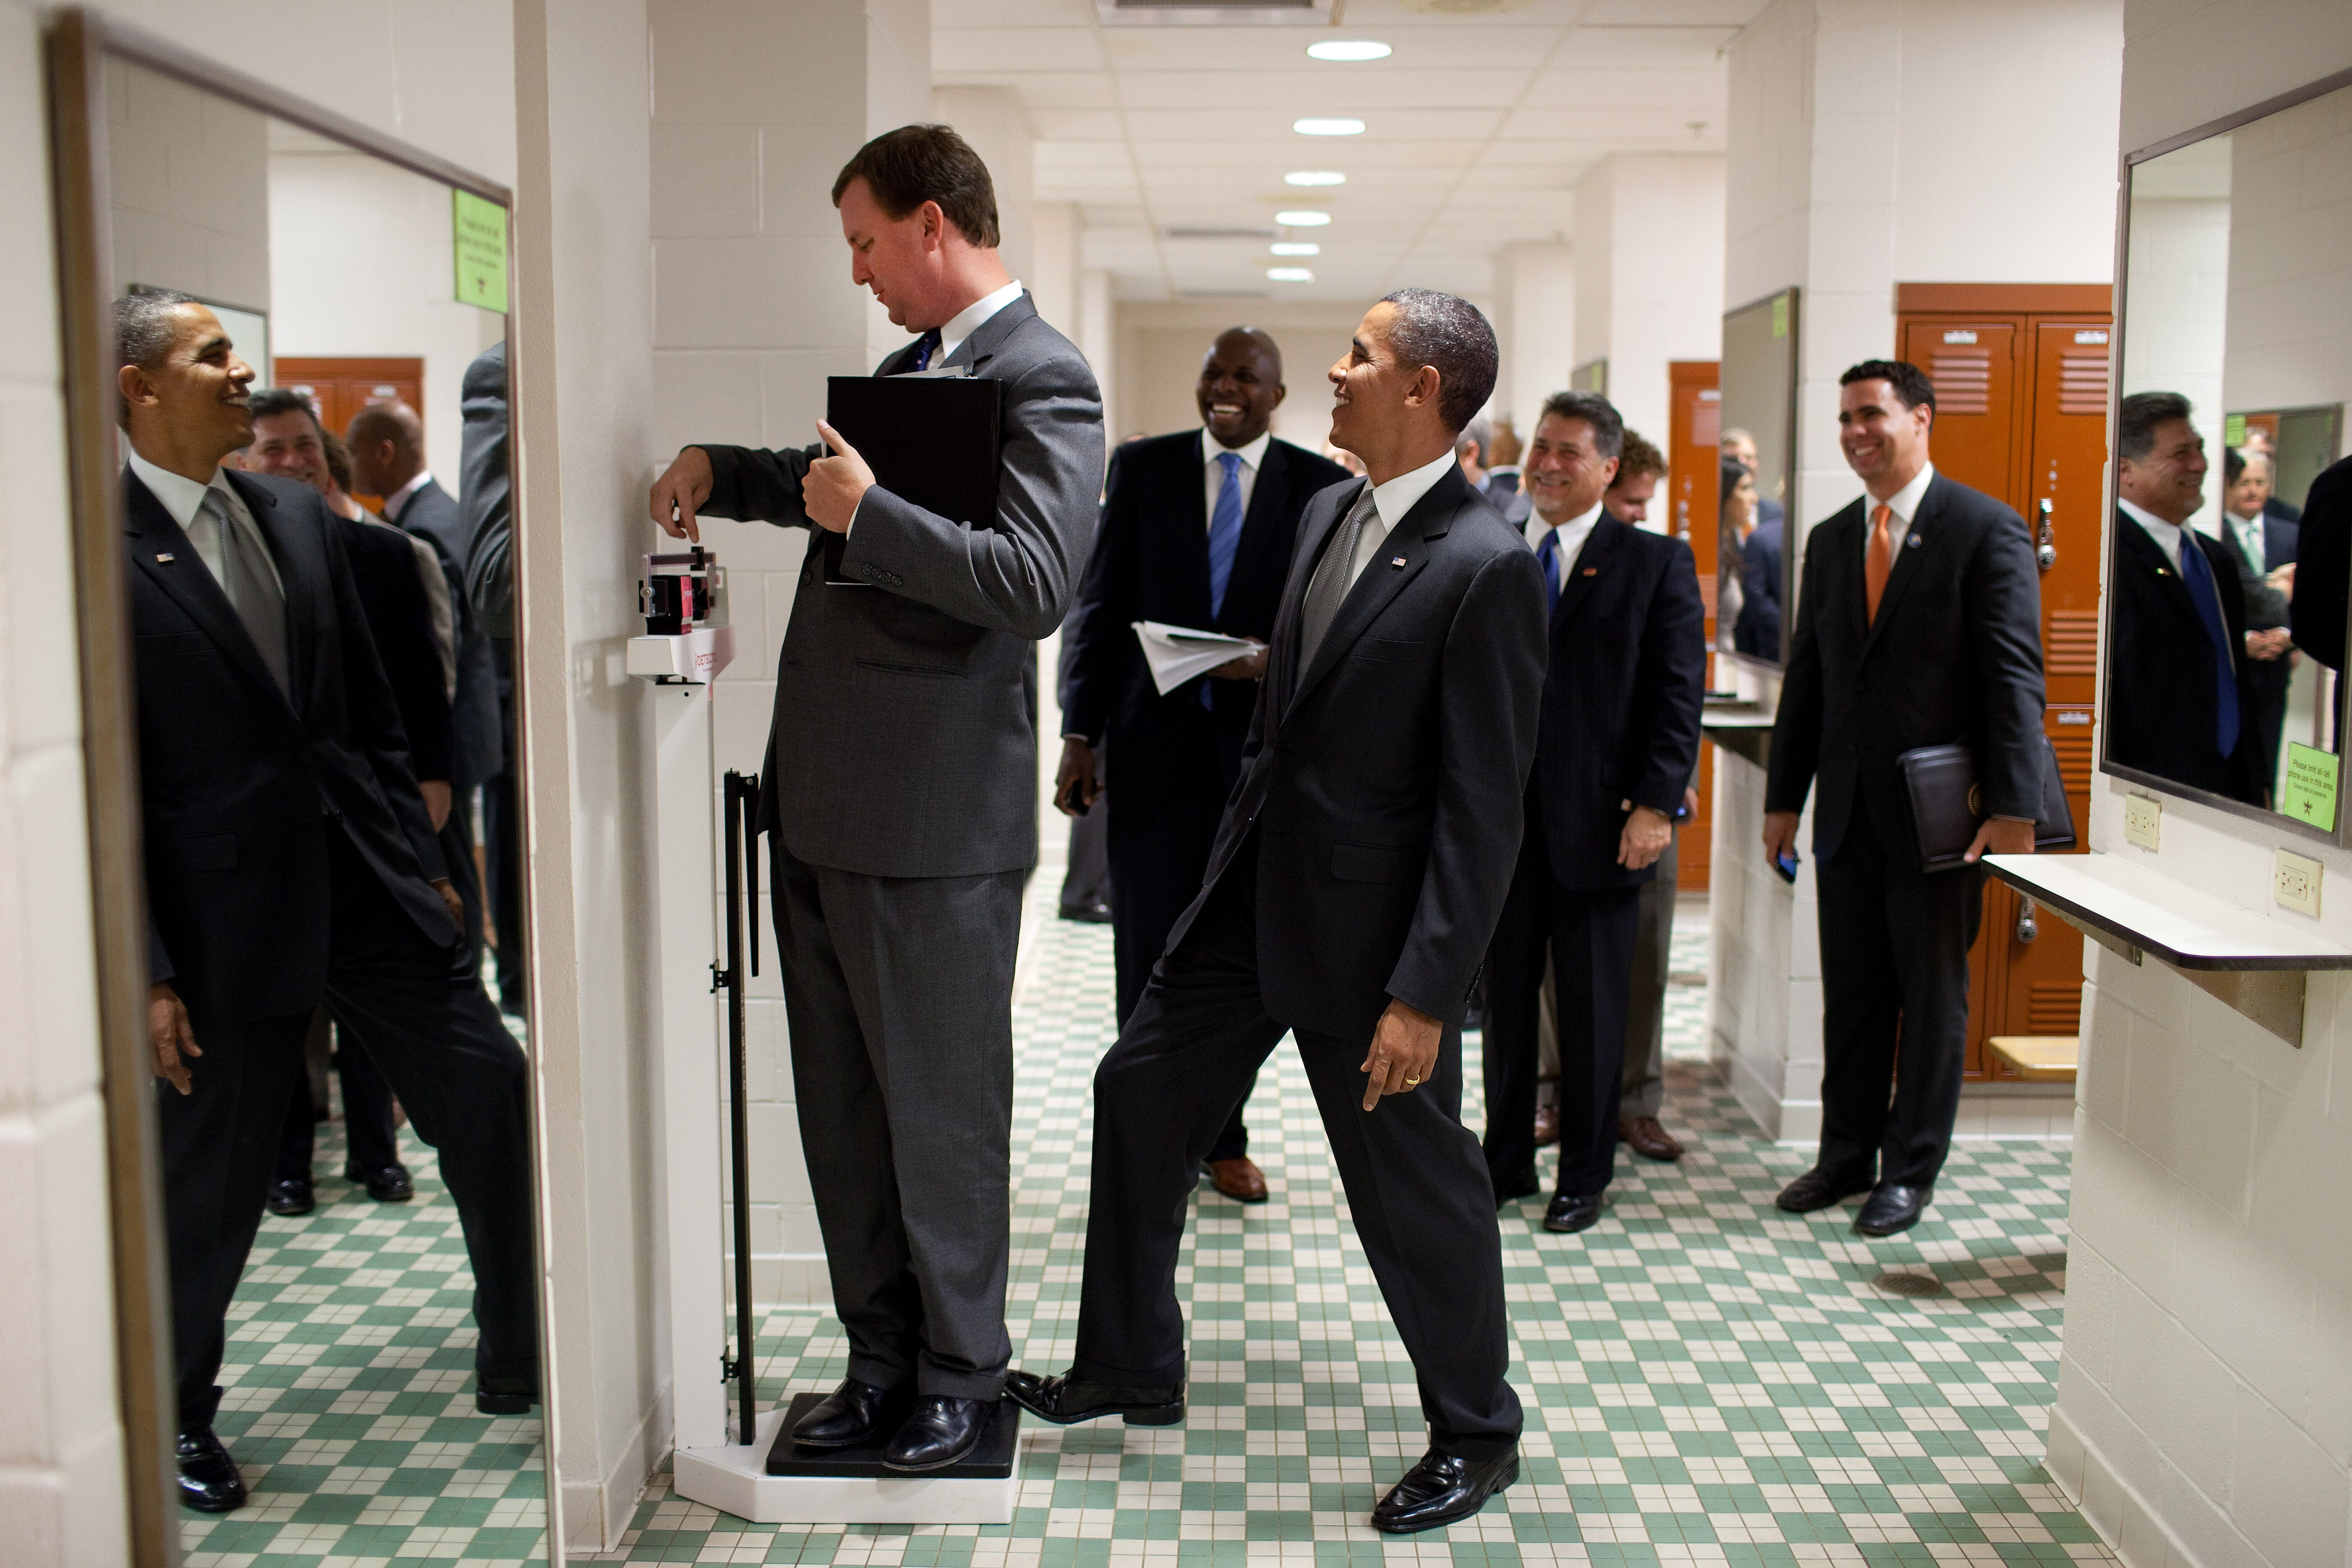

In [ ]:
Image(filename=destination_file_name)

As we see the model was not able to pick the dynamics of the situation (the humor with which president Obama is joking). Let's use advanced prompting techniques and see what happens.

In [ ]:
prompt = """You are a perceptive image analyst, adept at uncovering the full story within a visual scene.
Your task is to provide a rich and insightful description of the image.

Key Points:
- Decipher the Visual Puzzle.
- Uncover Hidden Meanings.
- Navigate Complex Dynamics.
- Spotlight the Heart of the Matter.
- Craft a Captivating Narrative.

Remember:
- The most compelling descriptions not only capture what's visible but also hint at what lies beneath the surface.
- Try to recover hidden meaning from the scene, for example some hidden humor.
"""

In [ ]:
generate(model, prompt, image_content, safety_settings, generation_config) # updated description with prompt changes

The image captures a candid moment in a hallway, likely in a school or community center, where a seemingly mundane act of weighing oneself transforms into a humorous tableau of power dynamics, camaraderie, and the ever-relatable experience of weight consciousness. 

At the center stands a man in a dark suit, his face a mix of concentration and resignation as he stands on a scale. His white shirt peeks out from the collar, perhaps a symbol of vulnerability in this moment of truth.  His tie is loosened, suggesting he's prepared for a serious reading.  Looming over him, with a playful grin and a hand on his shoulder, is former President Barack Obama.  Obama's body language exudes a relaxed confidence, a stark contrast to the man on the scale.  He seems to be enjoying the moment, perhaps offering a lighthearted comment.

Adding to the scene's intrigue is the presence of several other men, all sharply dressed, who observe the weigh-in with varying degrees of amusement.  Their expressions ra

#### What changed
We see that after we changed the prompt, the gemini-flash was able to capture **humor and playful interaction**. This is an example of better prompt engineering. How did we do it? There are no theoretical foundations for best prompt engineering but with a lot of practice and heuristics, it is still possible to follow the set of best practices:

- Use persona (you are a perceptive image analyst)
- Use mission (your task is to provide rich description)
- Use structured instructions (we use bullet points, but we also can use XML tags)
- *#### Todo: Discuss with Rajesh: maybe we can link the Prompt CheatSheet here somehow*

### Image Understanding Task. System instruction

To achieve the desired behaviour, we can use system instruction. System instruction behaves more "sticky" during multi-turn behaviour, for example if you want to achieve some behaviour that the model will constantly follow, then system instruction is the best way to put this instruction

In [ ]:
system_prompt = """You are a perceptive image analyst, adept at uncovering the full story within a visual scene.
Your task is to provide a rich and insightful description of the image.

Key Points:
- Decipher the Visual Puzzle.
- Uncover Hidden Meanings.
- Navigate Complex Dynamics.
- Spotlight the Heart of the Matter.
- Craft a Captivating Narrative.

Remember:
- The most compelling descriptions not only capture what's visible but also hint at what lies beneath the surface.
- Try to recover hidden meaning from the scene, for example some hidden humor.
"""

In [ ]:
model = GenerativeModel(MODEL_NAME, system_instruction=system_prompt)
simple_prompt = "Describe what is depicted on the image"

In [ ]:
generate(model, simple_prompt, image_content, safety_settings, generation_config)

The image captures a seemingly candid moment in a men's locker room, starring none other than former President Barack Obama. The setting itself is both ordinary and unexpected – the gleaming white tiles, the orange lockers, and the institutional-style mirror all speak to the mundane, yet the presence of the President elevates the scene to one of political intrigue. 

The heart of the matter lies in the playful dynamic between Obama and an unidentified man stepping onto a scale.  The man, clutching a folder and seemingly absorbed in the impending reading, is oblivious to Obama's mischievous grin and extended foot, poised to playfully disrupt the weigh-in. 

The image is teeming with hidden meanings. Is Obama's gesture a lighthearted jab at a colleague, a moment of levity amidst the pressures of the presidency? Or perhaps it speaks to a more strategic side, a subtle assertion of dominance or control even in a seemingly casual setting? 

Adding to the intrigue is the reaction of the other

### What changed
In this example we achieved the same level of description, but with using system prompt:
- We put the Suggestions, Instructions, Persona and Mission into system prompt
- We used the simple prompt from example 1

### Image Understanding Task. Few-shot examples.

Let's examine how to use few-shot examples with multimodal Image Understanding task. We will want to output the name of the ML model together with number of blocks. We will show 3 pictures of RNN, GRU and LSTM and we will count how many blocks are in Transformers picture.

In [ ]:
!gsutil cp gs://{bucket_name}/example_2.png example_2.png
!gsutil cp gs://{bucket_name}/example_3.png example_3.png
!gsutil cp gs://{bucket_name}/example_4.png example_4.png
!gsutil cp gs://{bucket_name}/example_5.png example_5.png

Copying gs://multimodal-examples/example_2.png...
/ [1 files][ 66.2 KiB/ 66.2 KiB]                                                
Operation completed over 1 objects/66.2 KiB.                                     
Copying gs://multimodal-examples/example_3.png...
/ [1 files][126.4 KiB/126.4 KiB]                                                
Operation completed over 1 objects/126.4 KiB.                                    
Copying gs://multimodal-examples/example_4.png...
/ [1 files][141.8 KiB/141.8 KiB]                                                
Operation completed over 1 objects/141.8 KiB.                                    
Copying gs://multimodal-examples/example_5.png...
/ [1 files][ 81.4 KiB/ 81.4 KiB]                                                
Operation completed over 1 objects/81.4 KiB.                                     


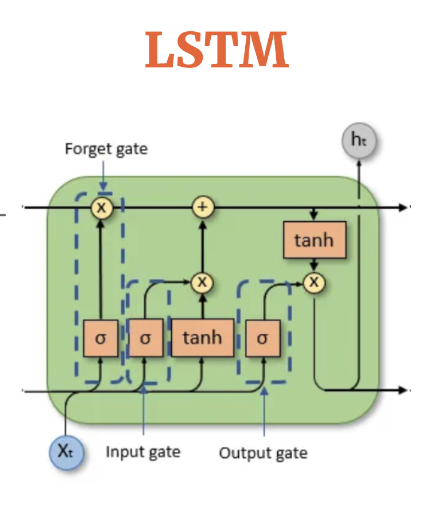

In [ ]:
Image(filename='example_4.png')

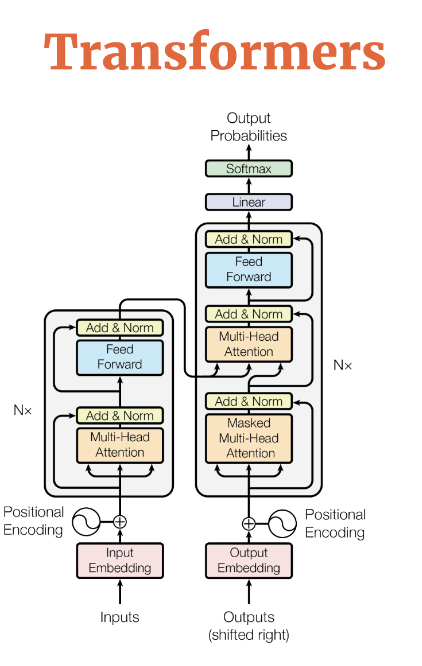

In [ ]:
Image(filename='example_5.png')

In [ ]:
def generate_with_few_shot(model, few_shot_examples, input_image, safety_settings, generation_config):
  responses = model.generate_content(
      few_shot_examples + [input_image],
      generation_config=generation_config,
      safety_settings=safety_settings,
      stream=True,
  )

  for response in responses:
    print(response.text, end="")

In [ ]:
few_shot_texts = ["Response: {'name': 'RNN', 'number_of_blocks': 1}", "Response: {'name': 'GRU', 'number_of_blocks': 3}", "Response: {'name': 'LSTM', 'number_of_blocks': 5}"]
few_shot_examples = []
for i in range(2, 5):
  encoded_image = base64.b64encode(open(f'example_{i}.png', "rb").read()).decode("utf-8")
  image_content = Part.from_data(data=base64.b64decode(encoded_image), mime_type="image/jpeg")
  few_shot_examples.append(image_content)
  few_shot_examples.append(few_shot_texts[i - 2])

len(few_shot_examples)

6

In [ ]:
encoded_image = base64.b64encode(open(f'example_5.png', "rb").read()).decode("utf-8")
image_content = Part.from_data(data=base64.b64decode(encoded_image), mime_type="image/jpeg")

In [ ]:
generate_with_few_shot(model, few_shot_examples, image_content, safety_settings, generation_config)

This series of images tells a humorous and relatable story about the evolution of recurrent neural networks (RNNs), a type of artificial intelligence used for processing sequential data. 

**Image 1: The Naive RNN**

Our story begins with the simple RNN, depicted as a single, somewhat lonely, green block labeled "tanh." It's a wide-eyed newcomer to the world, eager to tackle the complexities of language. The input "Xt" flows through it, leaving a trail of "ht" (hidden state) like breadcrumbs, hoping to make sense of it all. 

**Image 2: The Pragmatic GRU**

Next comes the GRU, a more sophisticated model with three interconnected blocks. It's like the RNN grew up a bit, realizing it needed some help to manage information flow. The addition of "Reset" and "Update" gates is like learning to prioritize and filter distractions, becoming more discerning in its processing.

**Image 3: The Sophisticated LSTM**

The LSTM arrives with an air of complexity, boasting five intricate blocks. This is

### Image Understanding. Order of images and texts

The usual recommendation is to put images before text, because this is how the training data was prepared. This is recommendation not only for Gemini (Multi-modal prompts, [source](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/design-multimodal-prompts) ), but this is also the case for Anthropic models (Claude, [source](https://docs.anthropic.com/en/docs/build-with-claude/vision)).

Having said that, it is not the ultimate rule and results can vary in your particular use-case. Below is the demonstration of image-then-text and text-then-image prompts to show that there is not meaningful difference between them.

In [ ]:
source_blob_name = "city_street.png"
destination_file_name = "city_street.png"

!gsutil cp gs://{bucket_name}/{source_blob_name} {destination_file_name}

Copying gs://multimodal-examples/city_street.png...
/ [1 files][439.5 KiB/439.5 KiB]                                                
Operation completed over 1 objects/439.5 KiB.                                    


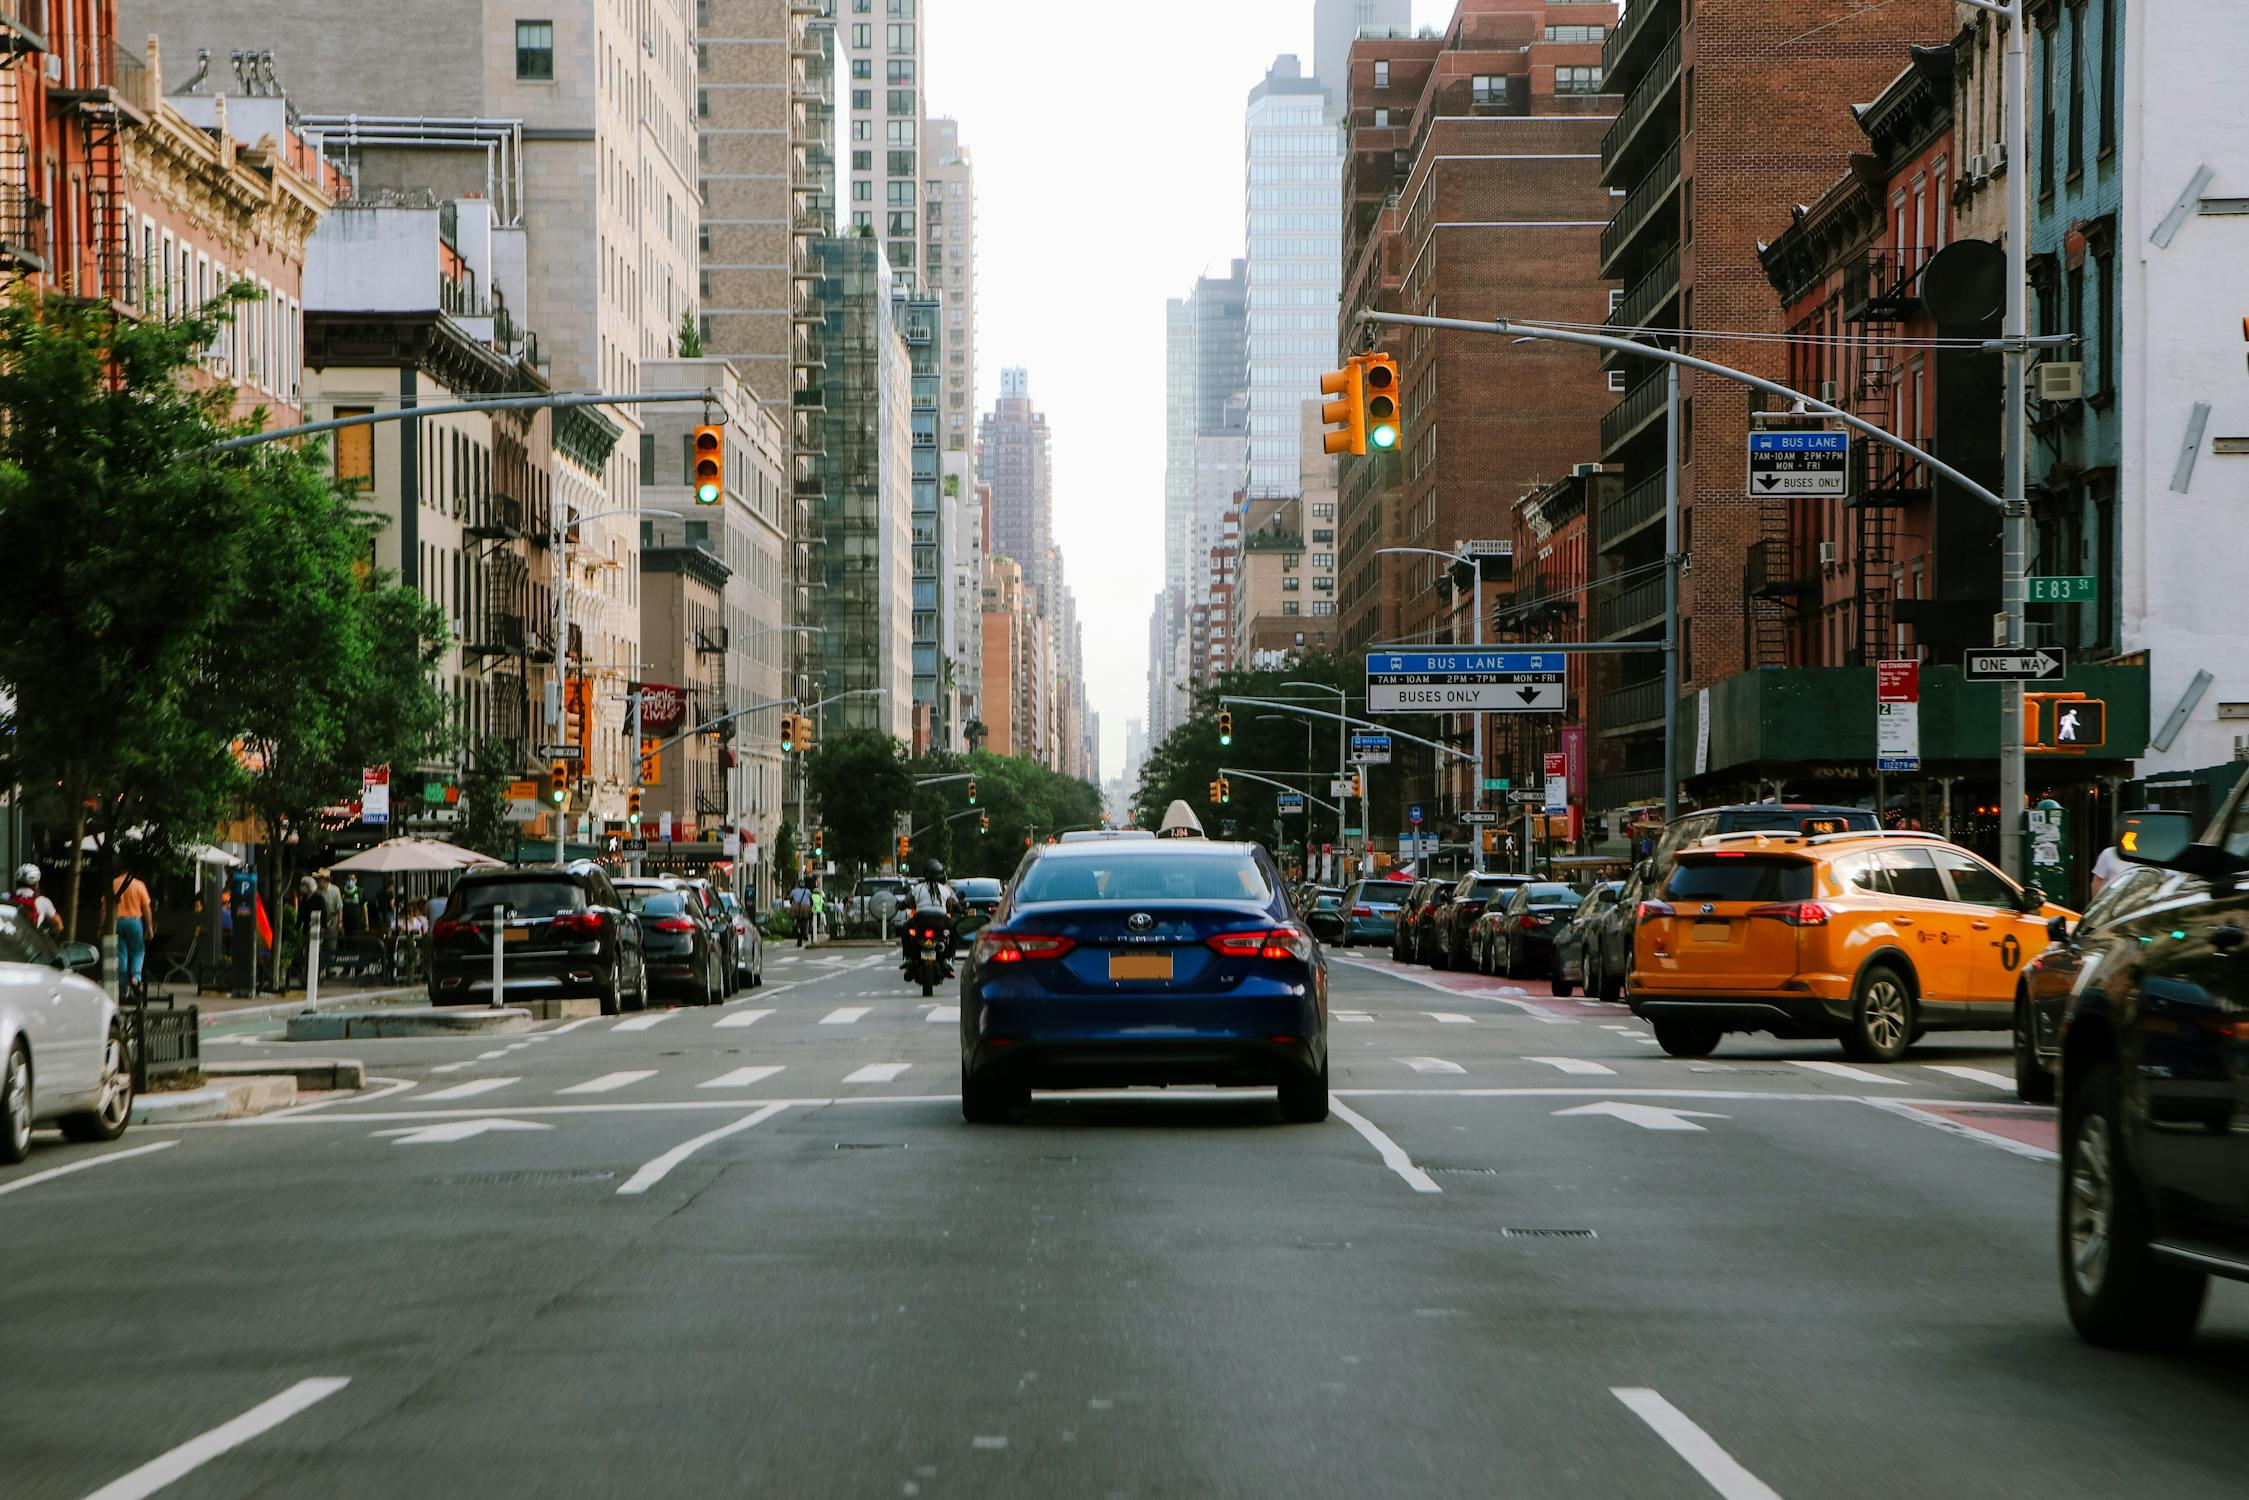

In [ ]:
Image(filename=destination_file_name)

In [ ]:
encoded_image = base64.b64encode(open(destination_file_name, "rb").read()).decode("utf-8")
image_content = Part.from_data(data=base64.b64decode(encoded_image), mime_type="image/jpeg")

In [ ]:
prompt = "Describe the image"

In [ ]:
model = GenerativeModel(MODEL_NAME)

In [ ]:
def generate_image_then_text(model, input_prompt, input_image, safety_settings, generation_config):
  responses = model.generate_content(
      [input_image, input_prompt],
      generation_config=generation_config,
      safety_settings=safety_settings,
      stream=True,
  )

  for response in responses:
    print(response.text, end="")

In [ ]:
generate_image_then_text(model, prompt, image_content, safety_settings, generation_config)

The image shows a busy street in New York City. There are cars and taxis driving in both directions. There are also people walking on the sidewalks. The buildings on either side of the street are tall and made of brick. The sky is visible in the distance and is a light blue color.

In [ ]:
def generate_text_then_image(model, input_prompt, input_image, safety_settings, generation_config):
  responses = model.generate_content(
      [input_prompt, input_image],
      generation_config=generation_config,
      safety_settings=safety_settings,
      stream=True,
  )

  for response in responses:
    print(response.text, end="")

In [ ]:
generate_text_then_image(model, prompt, image_content, safety_settings, generation_config)

The image is a street view of New York City. There are tall buildings on both sides of the street, and cars are driving in both directions. There is a bus lane in the middle of the street. The image is taken from the driver's seat of a car. The car in front is a blue Toyota. There is a yellow taxi to the right of the blue car. There are people walking on the sidewalks on both sides of the street. The image is taken during the day. The sky is blue and there are no clouds.

From this paricular experiment we don't see many changes. If you perform this several times, you will notice that sometimes image-then-text gives longer reponse, sometimes text-then-image gives longer response. But the usual way is to use first image and then text.

### Document understanding

Let's examine the task of document understanding using Gemini.

In [ ]:
source_blob_name = "order_1.png"
destination_file_name = "order_1.png"

!gsutil cp gs://{bucket_name}/{source_blob_name} {destination_file_name}

Copying gs://multimodal-examples/order_1.png...
/ [1 files][275.6 KiB/275.6 KiB]                                                
Operation completed over 1 objects/275.6 KiB.                                    


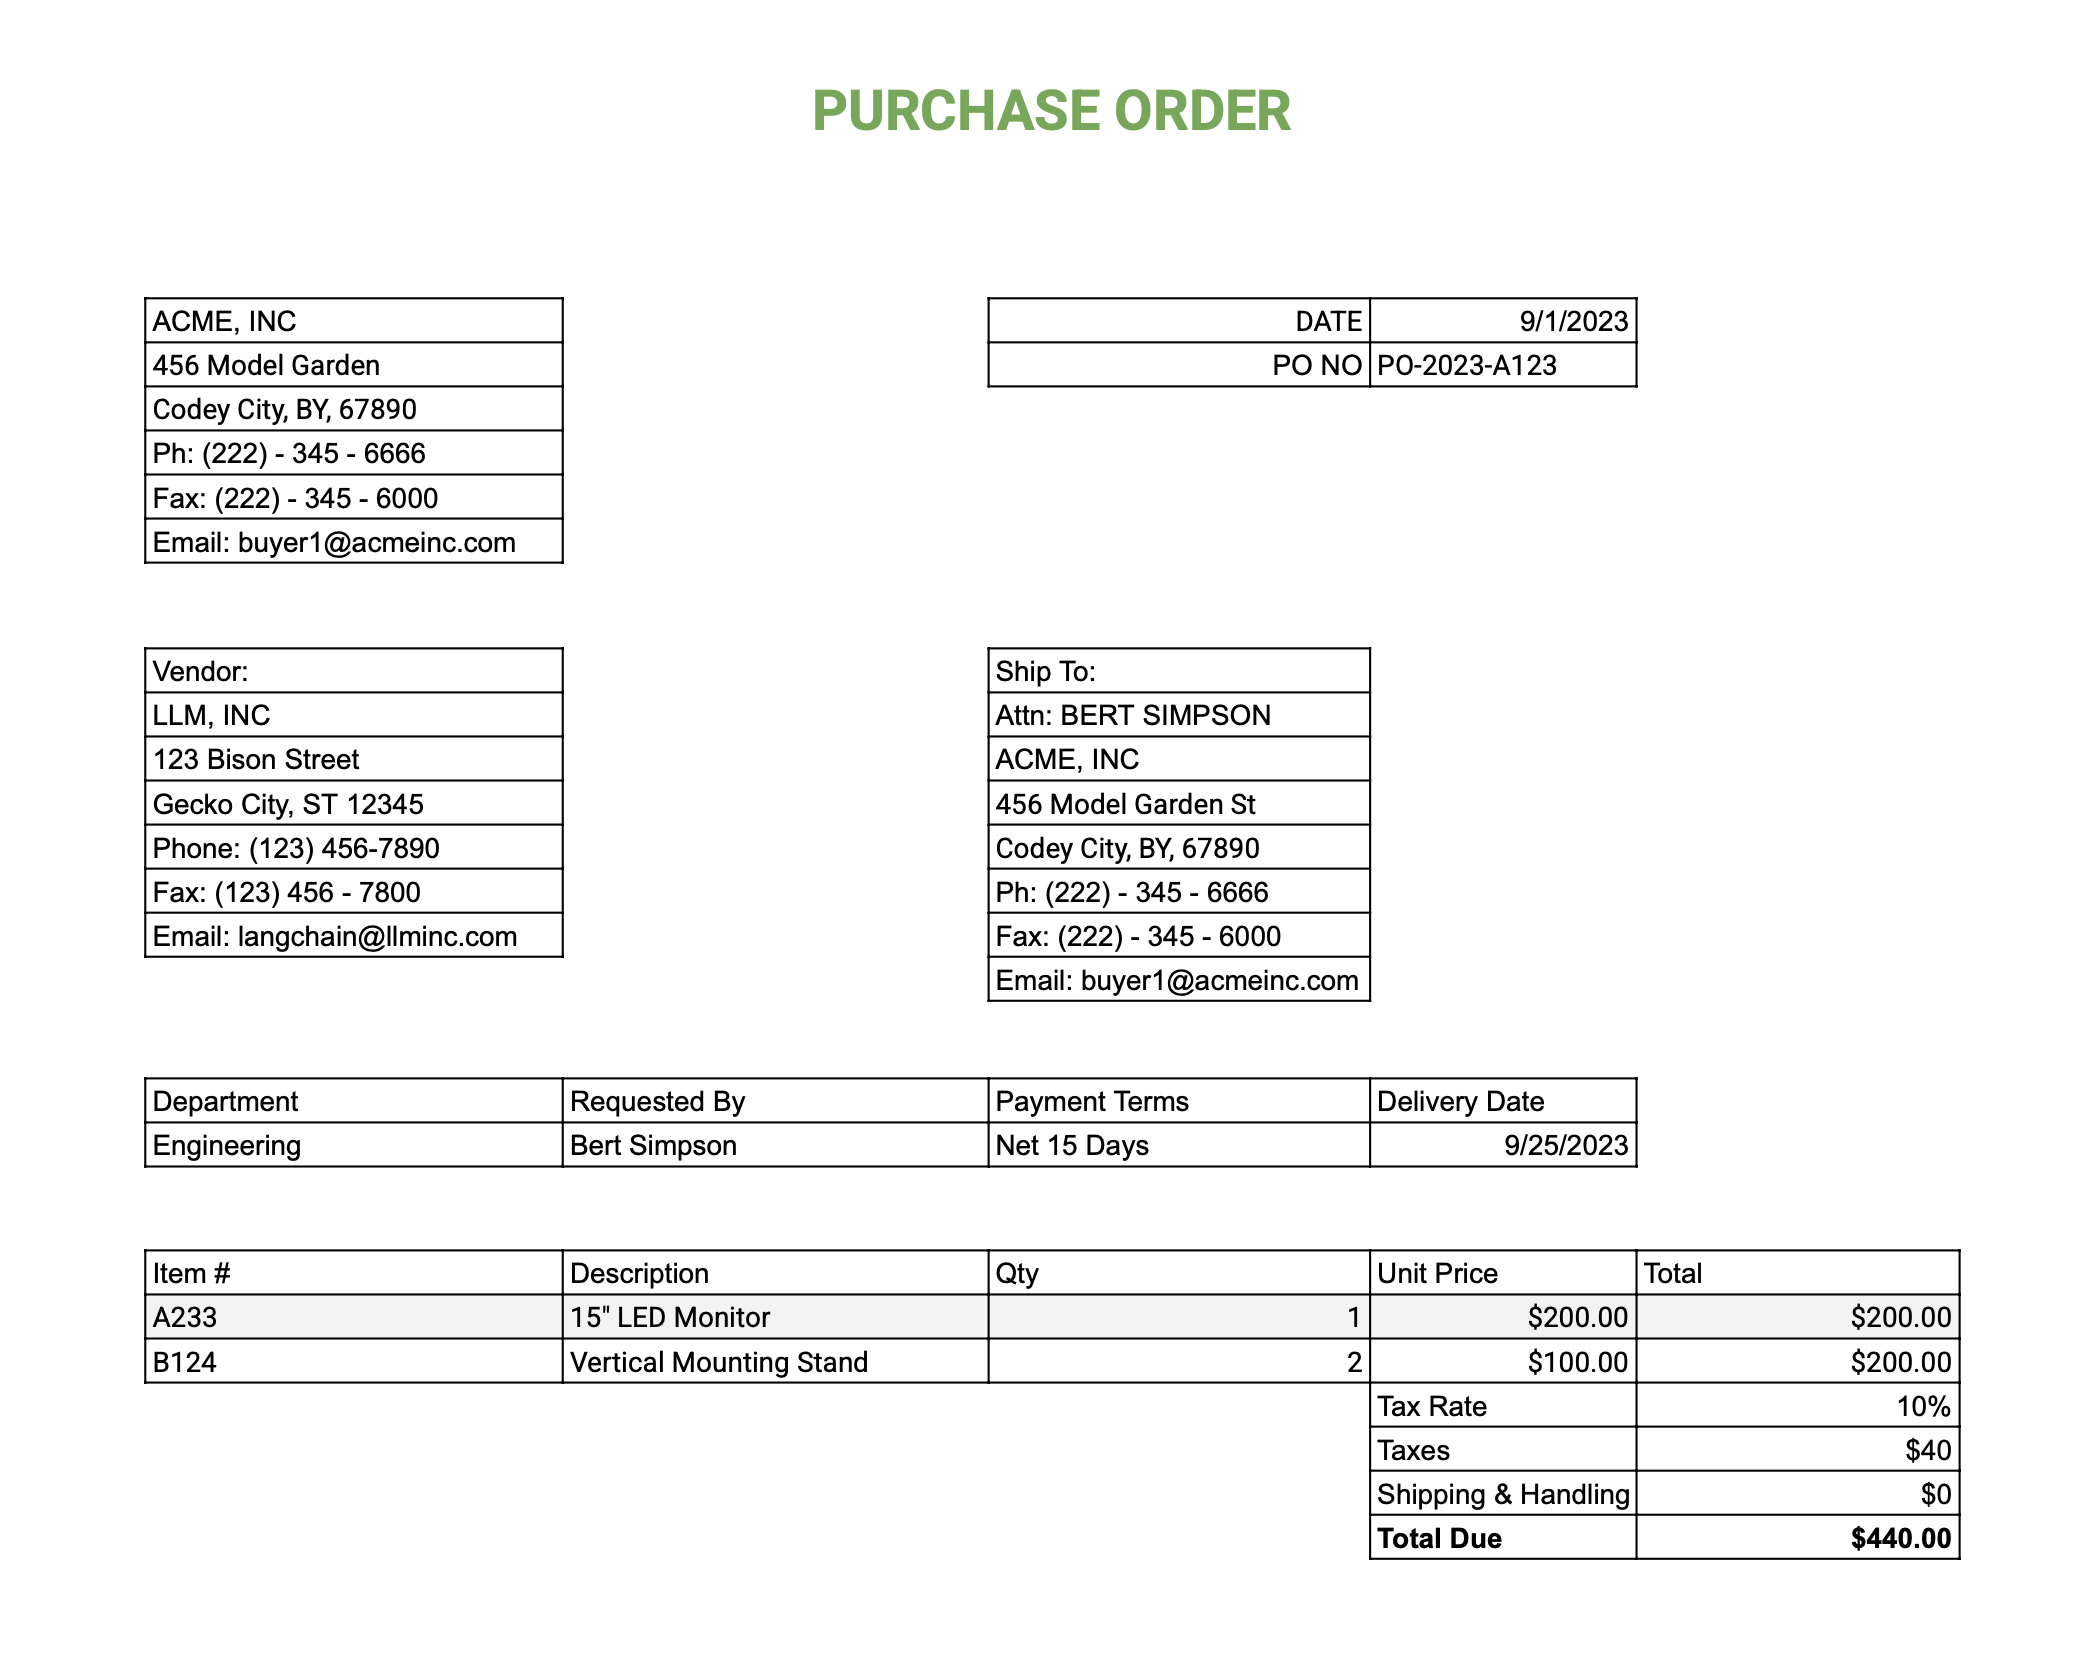

In [ ]:
Image(filename=destination_file_name)

In [ ]:
encoded_image = base64.b64encode(open(destination_file_name, "rb").read()).decode("utf-8")
image_content = Part.from_data(data=base64.b64decode(encoded_image), mime_type="image/jpeg")

In [ ]:
prompt = "Describe the image"

In [ ]:
model = GenerativeModel(MODEL_NAME)

In [ ]:
generate(model, prompt, image_content, safety_settings, generation_config)

The image is a purchase order from ACME, INC to LLM, INC for a 15" LED monitor and a vertical mounting stand. The purchase order is dated 9/1/2023 and the delivery date is 9/25/2023. The total amount due is $440.00.

As we see, the model successfully extracted main information, but it did not pick up all values from the table. Let's fix that with the same approach we used for task 1.

In [ ]:
prompt = """Persona: You are Gemini, a highly intelligent AI model with a vast knowledge base, capable of extracting all relevant information from bills, receipts, and various documents.

Mission: Your primary mission is to process the given document and identify all pertinent details such as the vendor/merchant name, date, transaction details (items, quantities, prices, etc.), total amount, payment method, and any other noteworthy information.

Instructions:

- Analyze Document Structure
- Identify Key Sections
- Extract Data:
  - Vendor/Merchant Name
  - Date
  - Transaction Details:
    - Items
    - Quantities
    - Prices
    - Subtotals
    - Total Amount
    - Payment Method
   - Other Information
- Present the extracted information in a clear and structured format, using appropriate headings and labels.

Suggestions:
- Handle Variations
- Prioritize Accuracy
- Handle Ambiguity
- Maintain Confidentiality"""

In [ ]:
def generate(model, input_prompt, input_image, safety_settings, generation_config):
  responses = model.generate_content(
      [input_image, input_prompt],
      generation_config=generation_config,
      safety_settings=safety_settings,
      stream=True,
  )
  output = []
  for response in responses:
    output.append(response.text)
  return ''.join(output)

In [ ]:
from IPython.display import display, Markdown, Latex
output = generate(model, prompt, image_content, safety_settings, generation_config)
display(Markdown(output))

## Purchase Order Summary

**Vendor:** LLM, INC
  - Address: 123 Bison Street, Gecko City, ST 12345
  - Phone: (123) 456-7890
  - Fax: (123) 456 - 7800
  - Email: langchain@llminc.com

**Purchaser:** ACME, INC
  - Address: 456 Model Garden, Codey City, BY, 67890
  - Phone: (222) - 345 - 6666
  - Fax: (222) - 345 - 6000
  - Email: buyer1@acmeinc.com

**Order Details:**
  - Date: 9/1/2023
  - PO Number: PO-2023-A123
  - Department: Engineering
  - Requested By: Bert Simpson
  - Ship To: 
    - Attn: BERT SIMPSON
    - Address: 456 Model Garden St, Codey City, BY, 67890

**Transaction Details:**

| Item # | Description | Qty | Unit Price | Total |
|---|---|---|---|---|
| A233 | 15" LED Monitor | 1 | $200.00 | $200.00 |
| B124 | Vertical Mounting Stand | 2 | $100.00 | $200.00 |
| **Subtotal:** | | | | $400.00 |
| **Tax Rate:** | | | | 10% |
| **Taxes:** | | | | $40.00 |
| **Shipping & Handling:** | | | | $0.00 |
| **Total Due:** | | | | **$440.00** |

**Payment Terms:** Net 15 Days
**Delivery Date:** 9/25/2023 


As we see with the modification of the prompt, the model was able to extract the entities from the table in the way we wanted to do it.

### Math Understanding
Image understanding task can involve not only Document Understanding, but also Math Understanding. This allows to upload the screenshot of mathematical problem and solve it via Gemini.

In [ ]:
source_blob_name = "math_1.png"
destination_file_name = "math_1.png"

!gsutil cp gs://{bucket_name}/{source_blob_name} {destination_file_name}

Copying gs://multimodal-examples/math_1.png...
/ [1 files][ 55.3 KiB/ 55.3 KiB]                                                
Operation completed over 1 objects/55.3 KiB.                                     


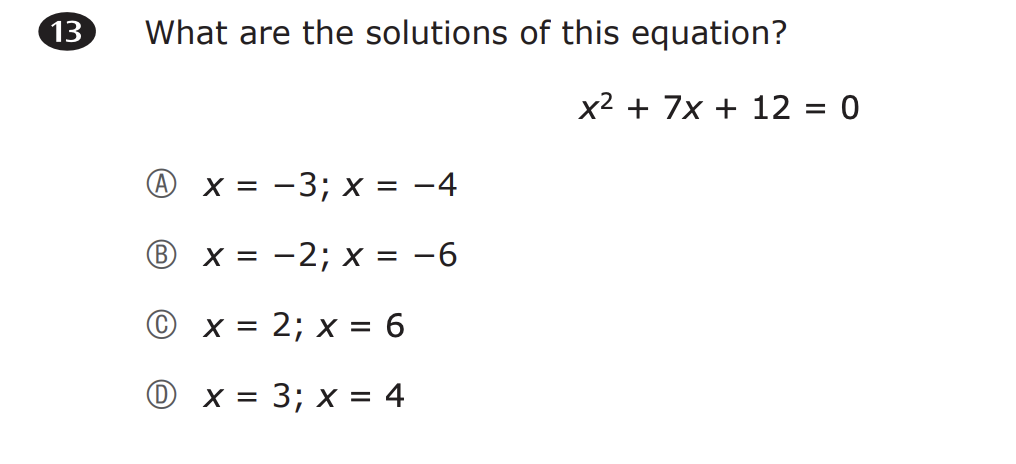

In [ ]:
Image(filename=destination_file_name)

In [ ]:
encoded_image = base64.b64encode(open(destination_file_name, "rb").read()).decode("utf-8")
image_content = Part.from_data(data=base64.b64decode(encoded_image), mime_type="image/jpeg")

In [ ]:
prompt = "Solve the mathematical problem"

In [ ]:
from IPython.display import display, Markdown, Latex
output = generate(model, prompt, image_content, safety_settings, generation_config)
display(Markdown(output))

The correct answer is **A x = −3; x = −4**. Here's how to solve it:

**Factoring**

1. **Find two numbers that add up to 7 and multiply to 12.** These numbers are 3 and 4.
2. **Rewrite the equation using these numbers:** (x + 3)(x + 4) = 0
3. **Set each factor equal to zero and solve for x:**
   * x + 3 = 0  -->  x = -3
   * x + 4 = 0  -->  x = -4

**Therefore, the solutions to the equation x² + 7x + 12 = 0 are x = -3 and x = -4.** 


In [ ]:
source_blob_name = "math_2.png"
destination_file_name = "math_2.png"

!gsutil cp gs://{bucket_name}/{source_blob_name} {destination_file_name}

Copying gs://multimodal-examples/math_2.png...
/ [1 files][ 13.0 KiB/ 13.0 KiB]                                                
Operation completed over 1 objects/13.0 KiB.                                     


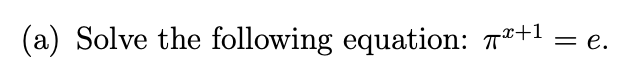

In [ ]:
Image(filename=destination_file_name)

In [ ]:
encoded_image = base64.b64encode(open(destination_file_name, "rb").read()).decode("utf-8")
image_content = Part.from_data(data=base64.b64decode(encoded_image), mime_type="image/jpeg")

In [ ]:
advanced_prompt = """Please provide a detailed, step-by-step solution, clearly outlining the reasoning behind each step. Show all intermediate results and calculations, ensuring a comprehensive and easy-to-follow explanation.

If the equation involves any specific mathematical concepts or techniques, please identify and explain them as part of the solution.

If there are multiple solutions or special cases, please address them comprehensively.

Finally, present the final answer or answers in a clear and concise manner. """

In [ ]:
output = generate(model, advanced_prompt, image_content, safety_settings, generation_config)
display(Markdown(output))

**(a) Solve the following equation:  π^(x+1) = e.**

**1. Take the natural logarithm of both sides:**

The natural logarithm (ln) is the inverse function of the exponential function with base *e*.  Taking the natural logarithm of both sides allows us to isolate the exponent.

```
ln(π^(x+1)) = ln(e) 
```

**2. Apply the logarithm power rule:**

The logarithm power rule states that ln(a^b) = b * ln(a). We can use this to bring the exponent down.

```
(x + 1) * ln(π) = ln(e)
```

**3. Simplify using ln(e) = 1:**

The natural logarithm of *e* is 1 (ln(e) = 1).

```
(x + 1) * ln(π) = 1
```

**4. Isolate x:**

Divide both sides by ln(π), then subtract 1 from both sides.

```
x + 1 = 1 / ln(π)

x = (1 / ln(π)) - 1 
```

**Therefore, the solution to the equation π^(x+1) = e is x = (1 / ln(π)) - 1.** 


### What changed
Here we ask LLM to use step-by-step reasoning and ask it to output intermediate steps also. This allows us to be more confident in the output answer. The current consensus in the community is that uutputing reasoning and intermediate steps helps LLM to "ground" the answer better.

### Image Understanding Task (Conclusion)

To summarize, with using the tips and tricks for better prompt, you can achieve better performance of the model, without changing the model/hyperparameters themselfes.
Let's mention the best practices one more time:
- Use specific instructions
- Explicitly set the Persona
- Explicitly set the Mission
- Explain the steps one-by-one
- Use structured output
- If you ask to output reasoning behind the decision, ask to output reasoning before the decision, for example helpfullness reasoning should come in output before helpfullness score
- Put media content before text content. If you have images, but image before the prompt, the same goes for audio and video.

Following these steps can help you to increase the performance of LLMs without a need for sophisticated finetuning.

### Image Generation Task
Image generiation task involves the unimodal input: just a text. The output is the generated image. The best practices for this type of task are listed [here](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb)